In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
df = pd.read_csv("sales_dataset.csv")

/tmp/ipython-input-1815440817.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("sales_dataset.csv")


In [30]:
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128949 entries, 0 to 128948
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128949 non-null  object 
 1   Date                128949 non-null  object 
 2   Status              128949 non-null  object 
 3   Fulfilment          128949 non-null  object 
 4   Sales Channel       128949 non-null  object 
 5   ship-service-level  128949 non-null  object 
 6   Style               128949 non-null  object 
 7   SKU                 128949 non-null  object 
 8   Category            128949 non-null  object 
 9   Size                128949 non-null  object 
 10  ASIN                128949 non-null  object 
 11  Courier Status      122078 non-null  object 
 12  Qty                 128949 non-null  int64  
 13  currency            121155 non-null  object 
 14  Amount              121155 non-null  float64
 15  ship-city           128916 non-nul

In [32]:
# Drop unnamed column
df.drop(columns=['Unnamed: 22'], inplace=True)

In [33]:
#Convert Date Column
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

/tmp/ipython-input-637557984.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [34]:
# Amount & currency missing
df['Amount'] = df['Amount'].fillna(0)
df['currency'] = df['currency'].fillna('Unknown')

# Courier Status
df['Courier Status'] = df['Courier Status'].fillna('Not Available')

# Promotion IDs
df['promotion-ids'] = df['promotion-ids'].fillna('No Promotion')

# Fulfilled By
df['fulfilled-by'] = df['fulfilled-by'].fillna('Unknown')

# Shipping details (small missing count)
df[['ship-city','ship-state','ship-country']] = df[['ship-city','ship-state','ship-country']].fillna('Unknown')


In [35]:
df.isnull().sum()


,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0
Size,0


In [36]:
df.to_csv("cleaned_ecommerce_data.csv", index=False)

In [37]:
df = df.dropna(subset=['ship-postal-code'])

In [38]:
df.isnull().sum()

,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0
Size,0


In [39]:
df = df.drop_duplicates()

**FINANCIAL PERFORMANCE ANALYSIS**

1) Analyzing total revenue growth over time

In [40]:
#Total Revenue Growth Over Time
total_revenue = df['Amount'].sum()
print("Total Revenue:", round(total_revenue, 2))

Total Revenue: 78553866.94


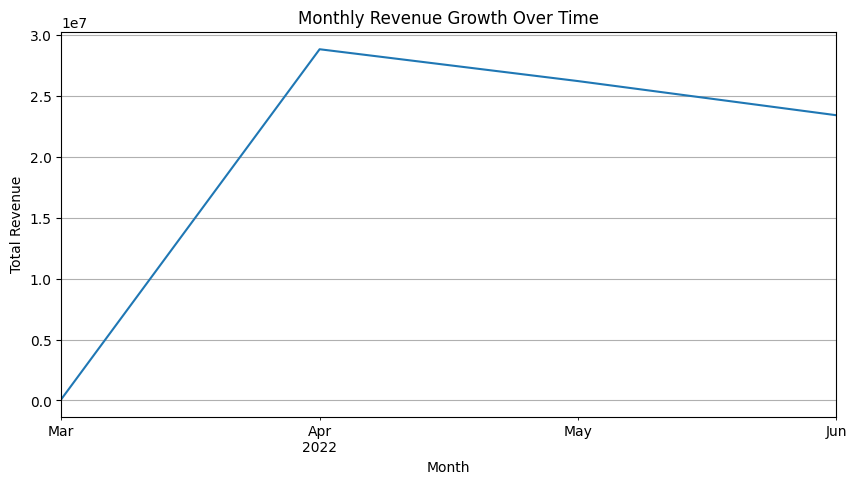

In [41]:
#Monthly Revenue Trend (Growth Over Time)
monthly_revenue = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum()

plt.figure(figsize=(10,5))
monthly_revenue.plot()
plt.title("Monthly Revenue Growth Over Time")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()


2) Identifying best-selling products and seasonal sales trends

In [42]:
#Best-Selling Products (By Quantity)
top_products_qty = df.groupby('SKU')['Qty'].sum().sort_values(ascending=False).head(10)
top_products_qty

,Qty
SKU,
JNE3797-KR-L,661
JNE3797-KR-M,560
JNE3797-KR-S,503
JNE3405-KR-L,485
J0230-SKD-M,468
J0230-SKD-S,421
JNE3797-KR-XL,416
JNE3405-KR-S,399
JNE3797-KR-XS,386


In [43]:
#Best-Selling Products (By Revenue)
top_products_revenue = df.groupby('SKU')['Amount'].sum().sort_values(ascending=False).head(10)
top_products_revenue

,Amount
SKU,
J0230-SKD-M,526536.20
JNE3797-KR-L,524581.77
J0230-SKD-S,479937.14
JNE3797-KR-M,453555.16
JNE3797-KR-S,407302.57
JNE3797-KR-XL,332155.24
J0230-SKD-L,305616.95
JNE3797-KR-XS,303616.70
SET268-KR-NP-XL,284058.96


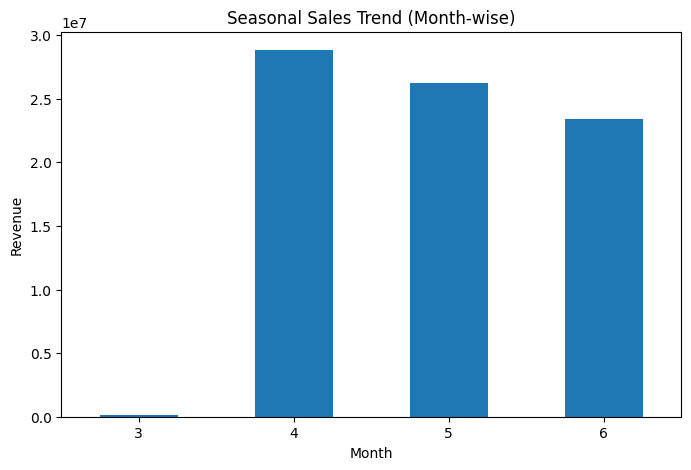

In [73]:
#Seasonal Sales Trends (Month-wise)
# Create Month Name column
df['Month_Name'] = df['Date'].dt.month_name()

# Seasonal sales by month name (keep calendar order)
seasonal_sales = df.groupby(df['Date'].dt.month)['Amount'].sum()

plt.figure(figsize=(8,5))
seasonal_sales.plot(kind='bar')
plt.title("Seasonal Sales Trend (Month-wise)")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=0)
plt.show()

3) Calculating the average order value to understand spending behavior

In [45]:
#Average Order Value Calculation
aov = df.groupby('Order ID')['Amount'].sum().mean()
print("Average Order Value (AOV):", round(aov, 2))

Average Order Value (AOV): 652.85


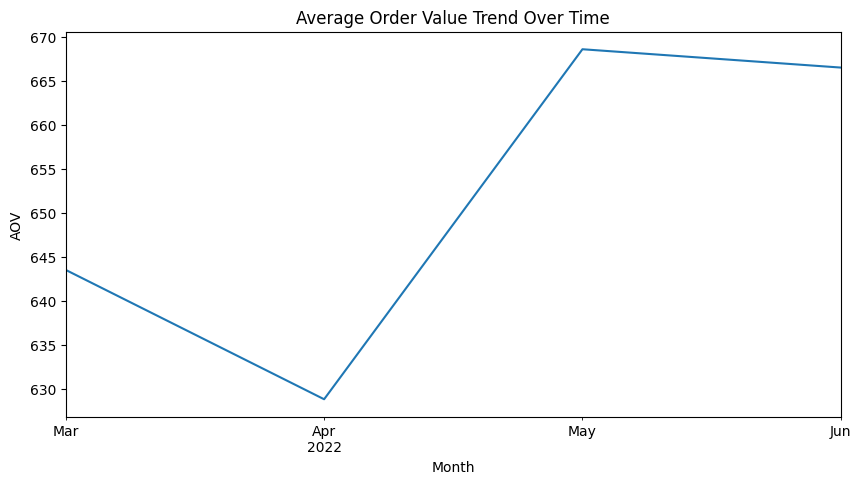

In [46]:
#Average Order Value Trend Over Time
monthly_aov = df.groupby(df['Date'].dt.to_period('M')).apply(
    lambda x: x.groupby('Order ID')['Amount'].sum().mean()
)

plt.figure(figsize=(10,5))
monthly_aov.plot()
plt.title("Average Order Value Trend Over Time")
plt.xlabel("Month")
plt.ylabel("AOV")
plt.show()

**CUSTOMER INSIGHTS ANALYSIS**

1) Identifying top-performing locations based on sales volume

In [47]:
#Top States by Revenue
state_sales = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)
state_sales.head(10)

,Amount
ship-state,
MAHARASHTRA,13332317.14
KARNATAKA,10477935.37
TELANGANA,6915325.65
UTTAR PRADESH,6813879.08
TAMIL NADU,6513926.11
DELHI,4234433.97
KERALA,3830227.58
WEST BENGAL,3507025.44
ANDHRA PRADESH,3219287.72


In [48]:
#Top Cities by Revenue
city_sales = df.groupby('ship-city')['Amount'].sum().sort_values(ascending=False)
city_sales.head(10)

,Amount
ship-city,
BENGALURU,6846485.99
HYDERABAD,4944742.82
MUMBAI,3703033.80
NEW DELHI,3613092.78
CHENNAI,3097021.74
PUNE,2336729.18
KOLKATA,1414978.87
GURUGRAM,1221068.74
THANE,1004355.29


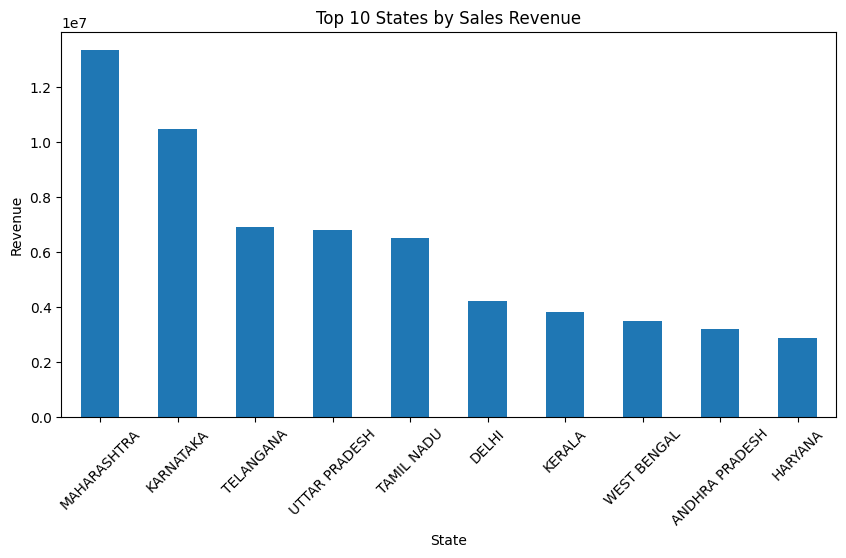

In [49]:
#Visualization – Top 10 States
plt.figure(figsize=(10,5))
state_sales.head(10).plot(kind='bar')
plt.title("Top 10 States by Sales Revenue")
plt.xlabel("State")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

2) Analyzing order cancellation trends and customer retention

In [50]:
#Overall Cancellation Rate
cancelled_orders = df[df['Status'].str.contains('Cancelled', case=False)]
cancel_rate = (len(cancelled_orders) / len(df)) * 100

print("Overall Cancellation Rate:", round(cancel_rate, 2), "%")

Overall Cancellation Rate: 14.22 %


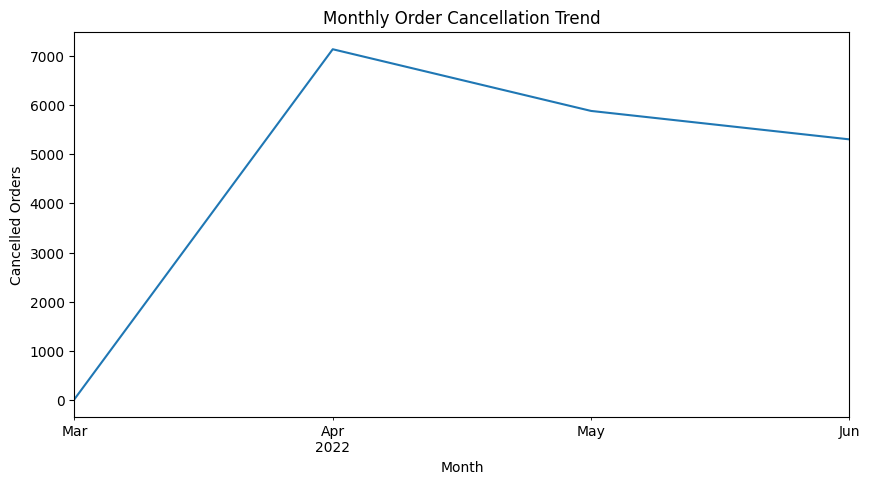

In [51]:
#Monthly Cancellation Trend
monthly_cancellations = cancelled_orders.groupby(
    cancelled_orders['Date'].dt.to_period('M')
)['Order ID'].count()

plt.figure(figsize=(10,5))
monthly_cancellations.plot()
plt.title("Monthly Order Cancellation Trend")
plt.xlabel("Month")
plt.ylabel("Cancelled Orders")
plt.show()

In [52]:
#Customer Retention (Repeat Orders)
repeat_customers = df['Order ID'].value_counts()
retained_orders = repeat_customers[repeat_customers > 1].count()

print("Repeat Orders Count:", retained_orders)

Repeat Orders Count: 6836


3) Differentiating B2B vs. B2C customer behavior for targeted marketing

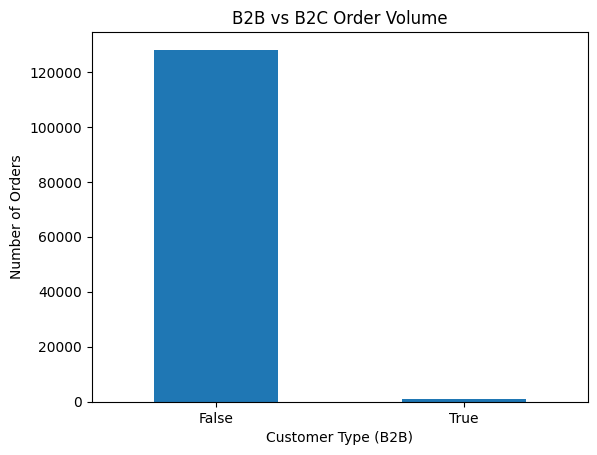

In [72]:
#Order Volume Comparison
b2b_b2c_orders = df['B2B'].value_counts()

plt.figure()
b2b_b2c_orders.plot(kind='bar')
plt.title("B2B vs B2C Order Volume")
plt.xlabel("Customer Type (B2B)")
plt.ylabel("Number of Orders")
plt.xticks(rotation=0)
plt.show()

In [54]:
#Revenue Comparison
b2b_b2c_revenue = df.groupby('B2B')['Amount'].sum()
b2b_b2c_revenue

,Amount
B2B,
False,77962646.15
True,591220.79


In [55]:
#Average Order Value by Customer Type
aov_b2b_b2c = df.groupby('B2B')['Amount'].mean()
aov_b2b_b2c

,Amount
B2B,
False,608.897650
True,678.783915


**LOGISTICS & FULFILLMENT OPTIMIZATION**

1) Addressing shipping delays by calculating average shipping times

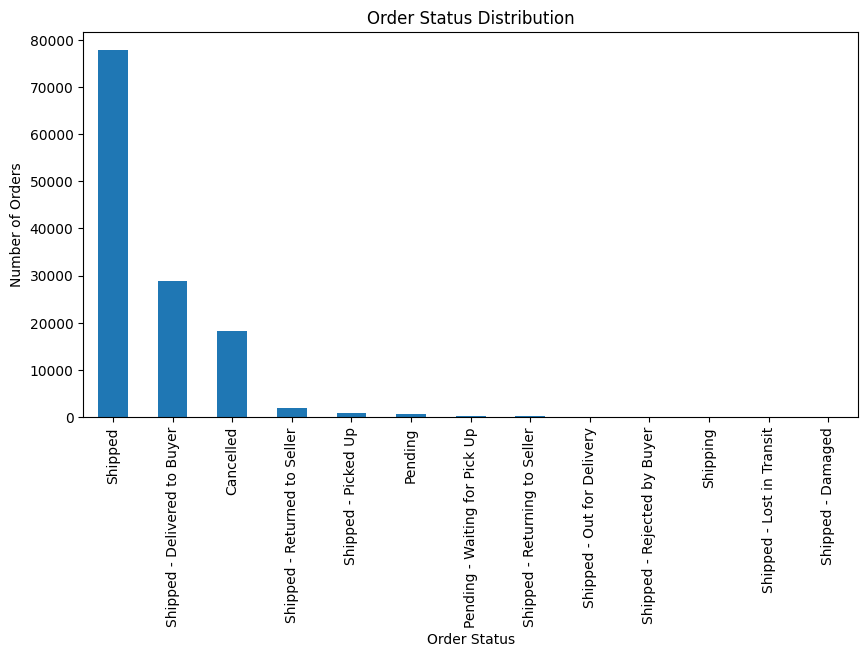

In [56]:
#Order Status Distribution
status_dist = df['Status'].value_counts()

plt.figure(figsize=(10,5))
status_dist.plot(kind='bar')
plt.title("Order Status Distribution")
plt.xlabel("Order Status")
plt.ylabel("Number of Orders")
plt.xticks(rotation=90)
plt.show()

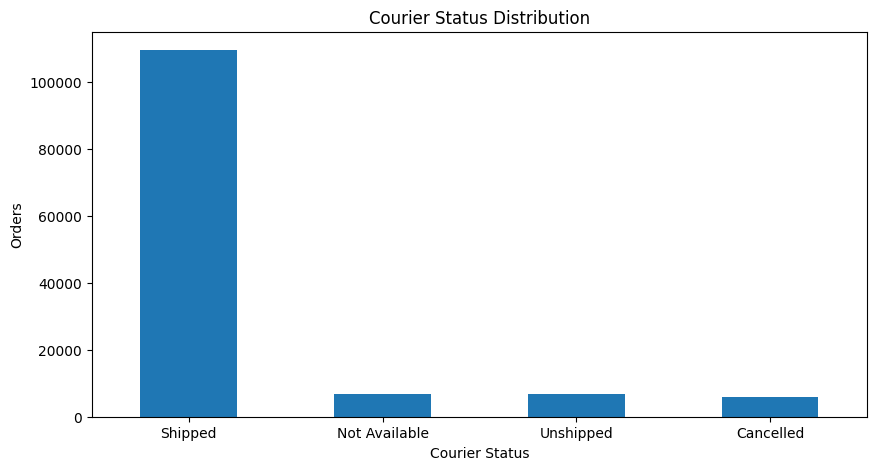

In [71]:
#Courier Status Analysis
courier_status_dist = df['Courier Status'].value_counts()

plt.figure(figsize=(10,5))
courier_status_dist.plot(kind='bar')
plt.title("Courier Status Distribution")
plt.xlabel("Courier Status")
plt.ylabel("Orders")
plt.xticks(rotation=0)
plt.show()

2) Comparing orders fulfilled by Amazon vs. Merchant fulfillment

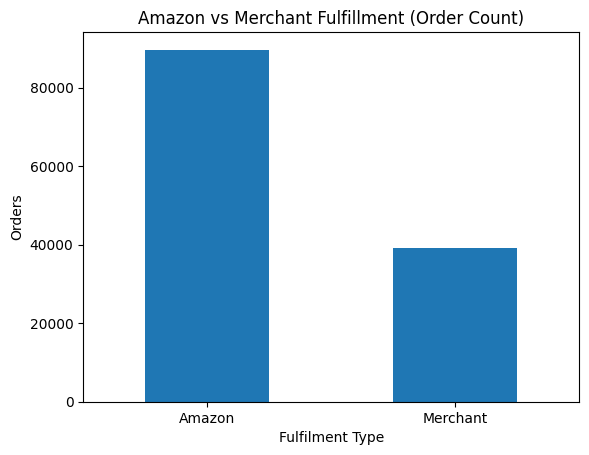

In [70]:
#Order Volume Comparison
fulfillment_orders = df['Fulfilment'].value_counts()

plt.figure()
fulfillment_orders.plot(kind='bar')
plt.title("Amazon vs Merchant Fulfillment (Order Count)")
plt.xlabel("Fulfilment Type")
plt.ylabel("Orders")
plt.xticks(rotation=0)
plt.show()

In [59]:
#Revenue Comparison
fulfillment_revenue = df.groupby('Fulfilment')['Amount'].sum()
fulfillment_revenue

,Amount
Fulfilment,
Amazon,54295952.00
Merchant,24257914.94


In [60]:
#Cancellation Rate by Fulfilment Type
cancel_by_fulfilment = (
    df[df['Status'].str.contains('Cancelled', case=False)]
    .groupby('Fulfilment')['Order ID']
    .count()
)

total_by_fulfilment = df.groupby('Fulfilment')['Order ID'].count()

cancel_rate_fulfilment = (cancel_by_fulfilment / total_by_fulfilment) * 100
cancel_rate_fulfilment

,Order ID
Fulfilment,
Amazon,12.796002
Merchant,17.472043


3) Improving order processing for faster deliveries.


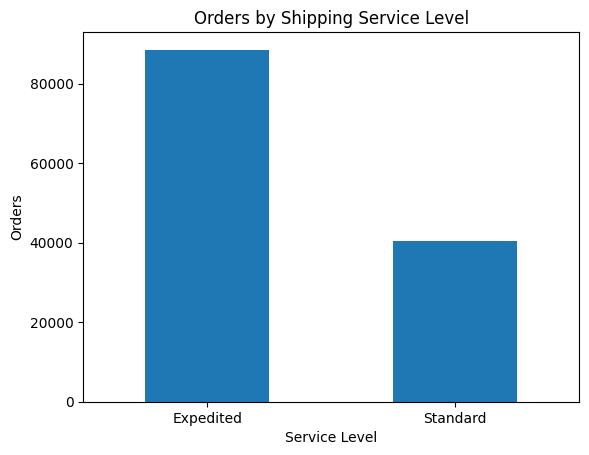

In [74]:
#Ship Service Level Performance
service_level_orders = df['ship-service-level'].value_counts()

plt.figure()
service_level_orders.plot(kind='bar')
plt.title("Orders by Shipping Service Level")
plt.xlabel("Service Level")
plt.ylabel("Orders")
plt.xticks(rotation=0)
plt.show()

In [75]:
#Service Level vs Order Status
service_status = pd.crosstab(df['ship-service-level'], df['Status'])
service_status

Status,Cancelled,Pending,Pending - Waiting for Pick Up,Shipped,Shipped - Damaged,Shipped - Delivered to Buyer,Shipped - Lost in Transit,Shipped - Out for Delivery,Shipped - Picked Up,Shipped - Rejected by Buyer,Shipped - Returned to Seller,Shipped - Returning to Seller,Shipping
ship-service-level,,,,,,,,,,,,,
Expedited,11424,413,0,76723,0,10,0,0,0,0,0,0,0
Standard,6907,245,281,1025,1,28754,5,35,973,11,1950,145,8


**PRODUCT MANAGEMENT & INVENTORY OPTIMIZATION**

1) Identifying high-demand product categories

In [63]:
#Demand by Quantity (True Demand)
category_demand_qty = df.groupby('Category')['Qty'].sum().sort_values(ascending=False)
category_demand_qty.head(10)

,Qty
Category,
Set,45275
kurta,45034
Western Dress,13942
Top,9900
Ethnic Dress,1052
Blouse,864
Bottom,398
Saree,152
Dupatta,3


In [64]:
#Demand by Revenue (Business Value)
category_revenue = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
category_revenue.head(10)

,Amount
Category,
Set,39185036.67
kurta,21286591.70
Western Dress,11211688.69
Top,5346262.30
Ethnic Dress,790362.66
Blouse,458408.18
Bottom,150667.98
Saree,123933.76
Dupatta,915.00


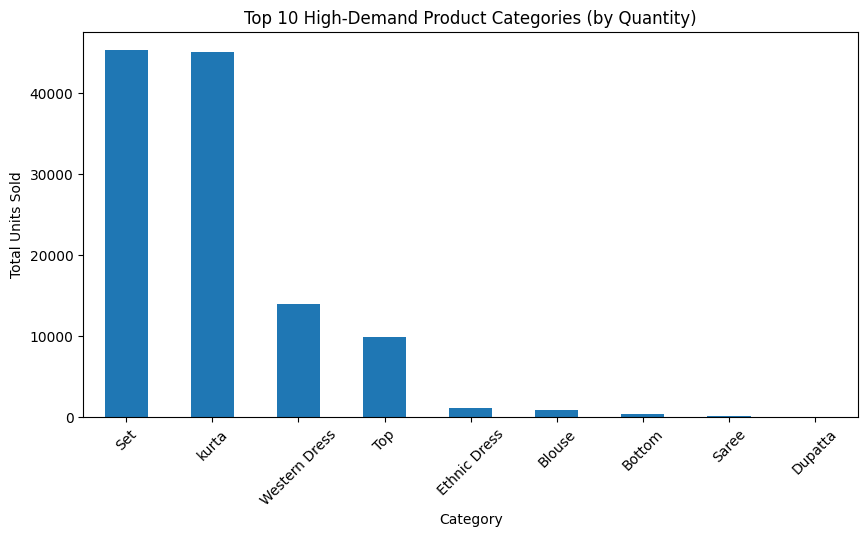

In [65]:
#Visualization – Top Categories by Quantity
plt.figure(figsize=(10,5))
category_demand_qty.head(10).plot(kind='bar')
plt.title("Top 10 High-Demand Product Categories (by Quantity)")
plt.xlabel("Category")
plt.ylabel("Total Units Sold")
plt.xticks(rotation=45)
plt.show()

2) Analyzing the average quantity ordered for efficient stock management.

In [66]:
#Average Quantity per Order
avg_qty_per_order = df.groupby('Order ID')['Qty'].sum().mean()
print("Average Quantity per Order:", round(avg_qty_per_order, 2))

Average Quantity per Order: 0.97


In [67]:
#Average Quantity by Category
avg_qty_by_category = df.groupby('Category')['Qty'].mean().sort_values(ascending=False)
avg_qty_by_category.head(10)

,Qty
Category,
Dupatta,1.000000
Blouse,0.933045
Top,0.932291
Saree,0.926829
Ethnic Dress,0.908463
Bottom,0.904545
kurta,0.903463
Set,0.900816
Western Dress,0.899832


3) Enhancing inventory control to prevent stockouts or overstocking.


In [68]:
#Demand Variability by Category
demand_variability = df.groupby('Category')['Qty'].std().sort_values(ascending=False)
demand_variability.head(10)

,Qty
Category,
Blouse,0.561705
Saree,0.359976
Bottom,0.323671
kurta,0.320856
Western Dress,0.313279
Set,0.312132
Ethnic Dress,0.297348
Top,0.265828
Dupatta,0.000000


**CUSTOMER SATISFACTION & RETURNS ANALYSIS**

1) Investigating high return and cancellation rates

In [77]:
#Overall Cancellation Rate
cancelled_orders = df[df['Status'].str.contains('Cancelled', case=False)]
cancel_rate = (len(cancelled_orders) / len(df)) * 100

print("Overall Cancellation Rate:", round(cancel_rate, 2), "%")

Overall Cancellation Rate: 14.22 %


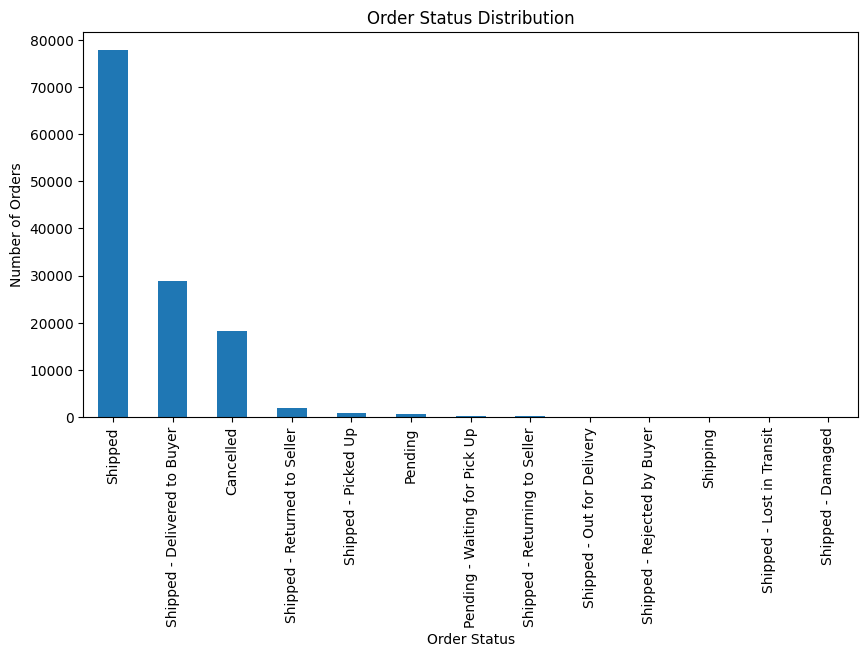

In [79]:
#Order Status Distribution
status_distribution = df['Status'].value_counts()

plt.figure(figsize=(10,5))
status_distribution.plot(kind='bar')
plt.title("Order Status Distribution")
plt.xlabel("Order Status")
plt.ylabel("Number of Orders")
plt.xticks(rotation=90)
plt.show()

2) Identifying problematic products/categories to enhance quality

In [80]:
#Cancellation Rate by Category
category_cancel = (
    df[df['Status'].str.contains('Cancelled', case=False)]
    .groupby('Category')['Order ID']
    .count()
)

total_category_orders = df.groupby('Category')['Order ID'].count()

category_cancel_rate = (category_cancel / total_category_orders * 100).sort_values(ascending=False)
category_cancel_rate.head(10)

,Order ID
Category,
Set,14.596100
kurta,14.546804
Western Dress,13.714986
Bottom,13.636364
Saree,12.804878
Ethnic Dress,12.607945
Blouse,12.526998
Top,12.016197
Dupatta,NaN


In [82]:
#Cancellation Rate by Shipping Service Level
cancel_by_service = (
    df[df['Status'].str.contains('Cancelled', case=False)]
    .groupby('ship-service-level')['Order ID']
    .count()
)

total_by_service = df.groupby('ship-service-level')['Order ID'].count()

cancel_rate_service = (cancel_by_service / total_by_service) * 100
cancel_rate_service

,Order ID
ship-service-level,
Expedited,12.898273
Standard,17.121963


In [83]:
#Courier Status Impact
courier_cancel = (
    df[df['Status'].str.contains('Cancelled', case=False)]
    .groupby('Courier Status')['Order ID']
    .count()
)

courier_cancel

,Order ID
Courier Status,
Cancelled,5833
Not Available,6853
Shipped,17
Unshipped,5628


3) Improving customer experience through better service policies

In [86]:
#Delivered vs Cancelled Comparison
delivery_success = pd.crosstab(df['Status'], df['ship-service-level'])
delivery_success

ship-service-level,Expedited,Standard
Status,,
Cancelled,11424,6907
Pending,413,245
Pending - Waiting for Pick Up,0,281
Shipped,76723,1025
Shipped - Damaged,0,1
Shipped - Delivered to Buyer,10,28754
Shipped - Lost in Transit,0,5
Shipped - Out for Delivery,0,35
Shipped - Picked Up,0,973


**Recommendations:**  

The company should optimize fulfillment operations to reduce delays and cancellations, focus on high-demand products and seasonal trends to drive revenue, enhance customer experience through better service and communication, and improve inventory planning to avoid stockouts or overstocking. Continuous monitoring of key performance metrics through dashboards will support informed, data-driven decisions.  


---


**Conclusion:**

Overall, the analysis shows that integrating operational efficiency, growth strategies, customer-centric practices, effective inventory management, and data-driven decision-making can significantly improve performance and ensure sustainable success in the competitive e-commerce market.